Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [2]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
#### load the movie dataset and create their dataframes

movies_df = pd.read_csv('movies.csv', sep=',')
# Check shape
print(movies_df.shape)
movies_df.head()


(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'] from the data set as they will not be used in the analysis.

In [4]:
# remove irrelevant columns

movies_df_new = movies_df.drop(['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'], axis=1)
# check new shape
print(movies_df_new.shape)
# Look at top 5 rows
movies_df_new.head()

(4803, 12)


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


#### Remove any duplicate rows

In [5]:
# remove duplicate rows
movies_df_new = movies_df_new.drop_duplicates()
# Check the shape
print(movies_df_new.shape)

(4803, 12)


#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [6]:
# Remove movies with zero revenue or budget
movies_df_new['revenue'] = movies_df_new['revenue'].fillna(0)
movies_df_new['budget'] = movies_df_new['budget'].fillna(0)
# Return the non zero rows
movies_df_new = movies_df_new[(movies_df_new[['budget','revenue']] != 0).all(axis=1)] #ref:stackexchange.com
# check the new shape
print(movies_df_new.shape)

(3229, 12)


#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [7]:
# Change the release_date column to DateTime column
movies_df_new['release_date'] = pd.to_datetime(movies_df_new['release_date'])

# Extract the release year from every release date
movies_df_new['release_year'] = pd.DatetimeIndex(movies_df_new['release_date']).year
# Check new shape
print(movies_df_new.shape)


(3229, 13)


#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [8]:
# change budget to int type
movies_df_new['budget'] =  movies_df_new['budget'].apply(np.int64)

# change revenue to int type
movies_df_new['revenue'] = movies_df_new['revenue'].apply(np.int64)

On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [9]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df_new.index,movies_df_new[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df_new.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
#parse_col_json('cast', 'name')
parse_col_json('production_countries', 'name')

movies_df_new.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012


### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

In [10]:
# Top 5 expensive movies
expensive = movies_df_new.sort_values(['budget'], ascending=False)[:5]
print(expensive)
#Top 5 cheapest movies
cheapest = movies_df_new.sort_values(['budget'], ascending=True)[:5]
print(cheapest)
# Check most expensive and cheapest movies
expensive_movie = movies_df_new['budget'].max()
cheapest_movie = movies_df_new['budget'].min()
print('\n Compare most expensive and cheapest movies\n')
print(f'most expensive movie = {expensive_movie}')
print(f'cheapest movie = {cheapest_movie}')



       budget                                             genres     id  \
17  380000000                 ['Adventure', 'Action', 'Fantasy']   1865   
1   300000000                 ['Adventure', 'Fantasy', 'Action']    285   
7   280000000         ['Action', 'Adventure', 'Science Fiction']  99861   
10  270000000  ['Adventure', 'Fantasy', 'Action', 'Science Fi...   1452   
4   260000000         ['Action', 'Adventure', 'Science Fiction']  49529   

    popularity          production_countries release_date     revenue  \
17  135.413856  ['United States of America']   2011-05-14  1045713802   
1   139.082615  ['United States of America']   2007-05-19   961000000   
7   134.279229  ['United States of America']   2015-04-22  1405403694   
10   57.925623  ['United States of America']   2006-06-28   391081192   
4    43.926995  ['United States of America']   2012-03-07   284139100   

    runtime                    spoken_languages  \
17    136.0              ['English', 'Español']   
1     16

<Figure size 200x200 with 0 Axes>

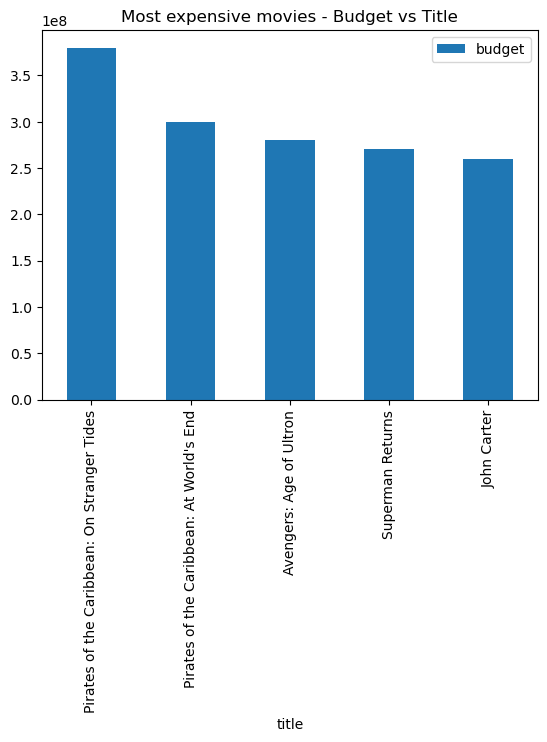

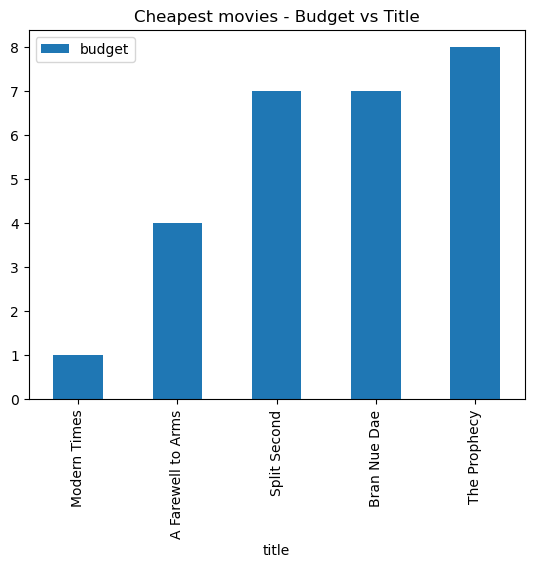

In [11]:
fig = plt.figure(figsize=(2,2))
# Plot most expensive movies 
expensive.plot(x='title', y='budget', kind='bar')
plt.title('Most expensive movies - Budget vs Title')
# Plot cheapest movies
cheapest.plot(x='title', y='budget', kind='bar')
plt.title('Cheapest movies - Budget vs Title')

plt.show()
plt.close()

#### The 5 most expensive movies are: 
Pirates of the Caribbean: On stranger Tides, Pirates of the Caribbean: At World's End, Avengers: Age of Ultron, Superman Returns and John Carter
#### The 5 cheapest movies are: 
Modern Times, A Farewell to Arms, Split Second, Bran Nue Dae and The Prophesy

There is a considerable difference between the budget for the most expensive and cheapest movies.



#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

max profit:2550965087
min profit:-165710090


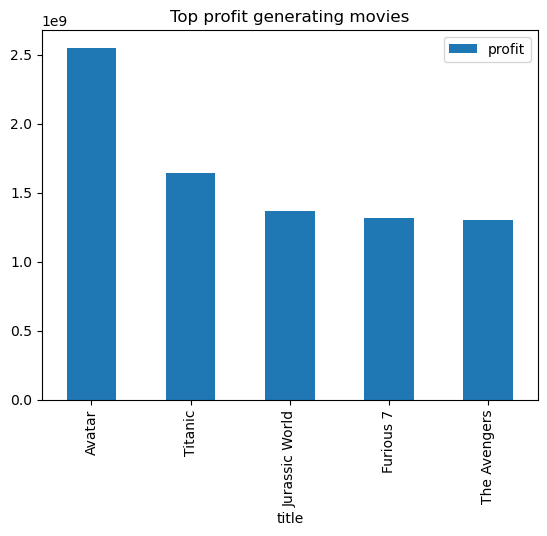

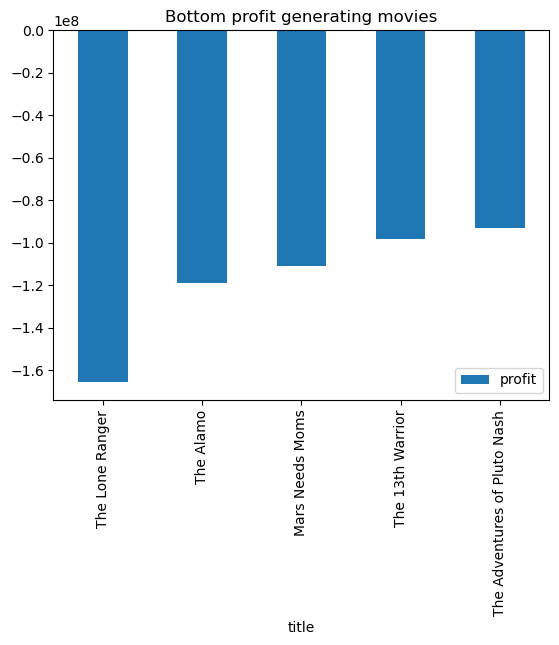

In [15]:
# profit column
movies_df_new['profit'] = movies_df_new['revenue'] - movies_df_new['budget']

#best and worst profit generating movies - Top 5
top_profit = movies_df_new.sort_values(['profit'], ascending=False)[:5]
bottom_profit = movies_df_new.sort_values(['profit'], ascending=True)[:5]

#plot graphs for best and worst movies based on profit
top_profit.plot(x='title', y='profit', kind='bar')
plt.title('Top profit generating movies')
bottom_profit.plot(x='title', y='profit', kind='bar')
plt.title('Bottom profit generating movies')

# Calculate max and min profit
max_profit = movies_df_new['profit'].max()
min_profit = movies_df_new['profit'].min()

# Display max and min profit
print(f'max profit:{max_profit}')
print(f'min profit:{min_profit}')




**Avatar** made the most profit of 2550965087 dollars. 
**The Lone Ranger** made the least profit of -165710090 dolloar. It actually lost money.

#### Find the most talked about movies. Sort the dataframe based on the popularity column.

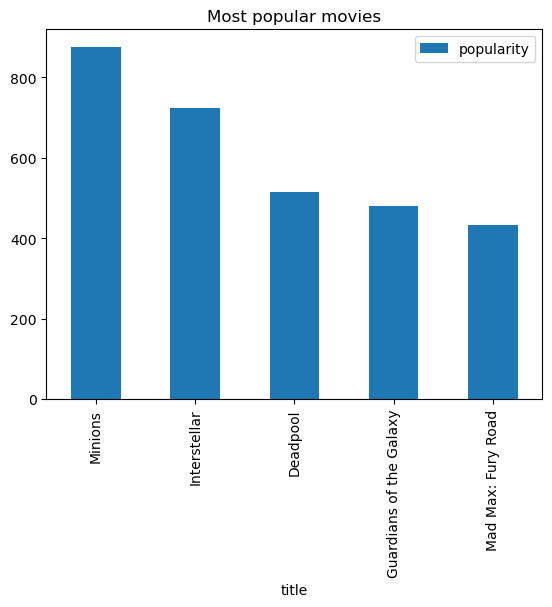

In [16]:
# Sort data by popularity
movies_df_new.sort_values(['popularity'], ascending=False).head()

# most plopular - Top 5
popular = movies_df_new.sort_values(['popularity'], ascending=False)[:5]

# Plot graph for polular movies
popular.plot(x='title', y='popularity', kind='bar')
plt.title('Most popular movies')
plt.show()
plt.close()

#### The 5 most talked about movies are:
Minions, Interstellar, Deadpool, Guardians of the Galaxy and Mad Max: Fury Road

#### Find Movies which are rated above 7



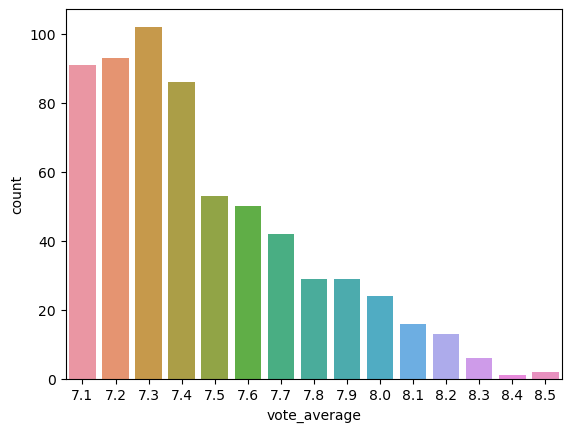

In [17]:
# movies rated above 7
above_7_rating = movies_df_new[movies_df_new['vote_average'] > 7]
# Create countplot 
sns.countplot(data=above_7_rating, x='vote_average')
plt.show()
plt.close()

Most movies with a rating above 7 are rated 7.3




#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

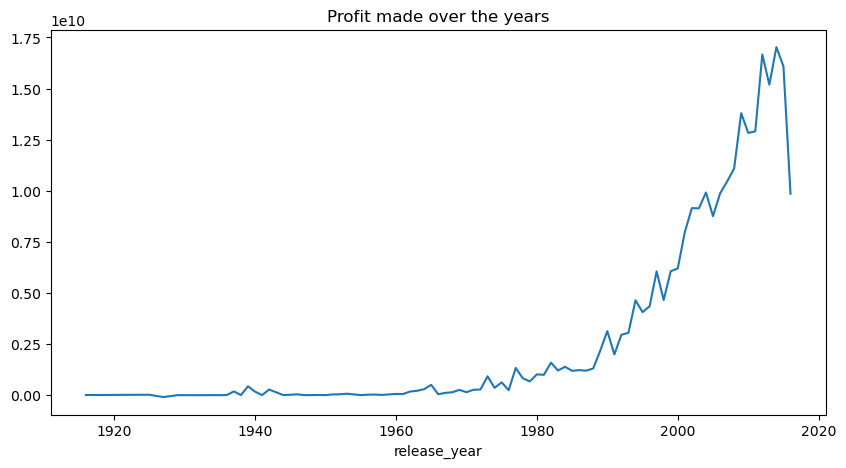

release_year
2007    10451427310
2008    11092175434
2009    13798015000
2010    12829866421
2011    12908799676
2012    16665370551
2013    15191240622
2014    17029736072
2015    16082841939
2016     9857836853
Name: profit, dtype: int64


17029736072

In [19]:
# sum the profit for each release_year
year_total = movies_df_new.groupby('release_year')['profit'].sum()
# plot a line graph
fig = plt.figure(figsize=(10,5))
year_total.plot(x='release_year', y='profit', kind='line')
plt.title('Profit made over the years')
plt.show()
plt.close()
#show last 10 years results
print(year_total[-10:])
#show max profit
year_total.max()


According to the line graph. It shows that the most profit was made in 2014.

#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

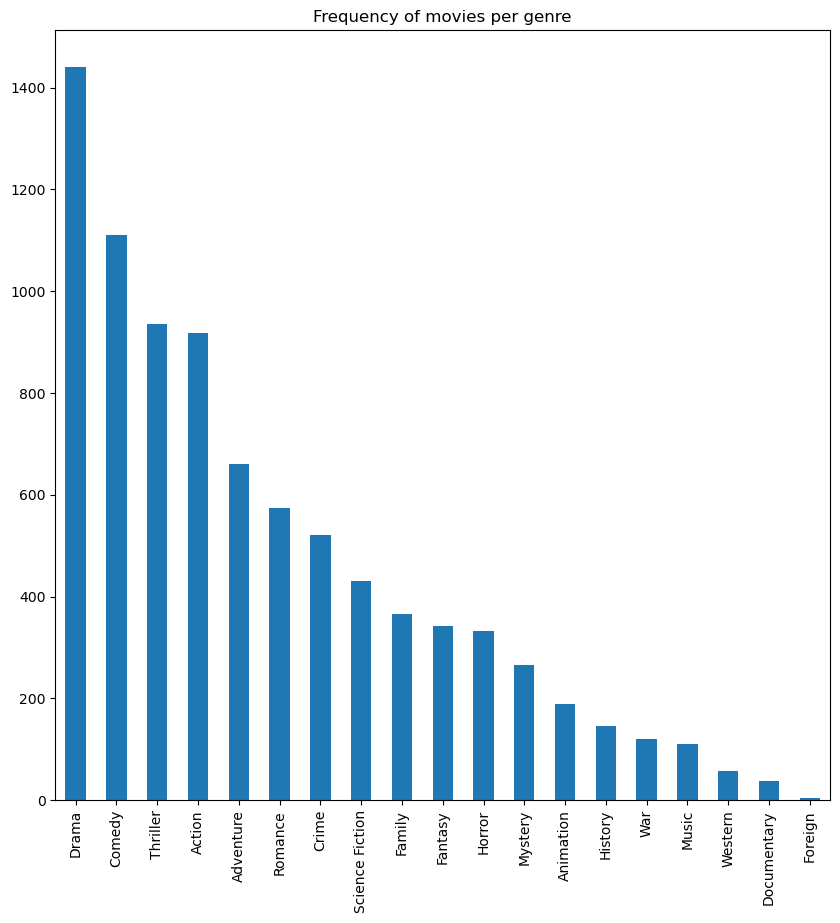

In [20]:
# Convert string to list
movies_df_new['genres'] = movies_df_new['genres'].apply(ast.literal_eval)
# explode list and remove potential duplicates
movies_df_new = movies_df_new.explode('genres').drop_duplicates()
# Count movies based on genre
data = movies_df_new['genres'].value_counts()
# Plot bar graph
fig = plt.figure(figsize=(10,10))
data.plot(kind='bar')
plt.title('Frequency of movies per genre')
plt.show()
plt.close()

Most movies are labeled under the drama genre. 

### Generate three different interesting visualisations with a data story.


Text(0.5, 1.0, 'Popularity vs Runtime')

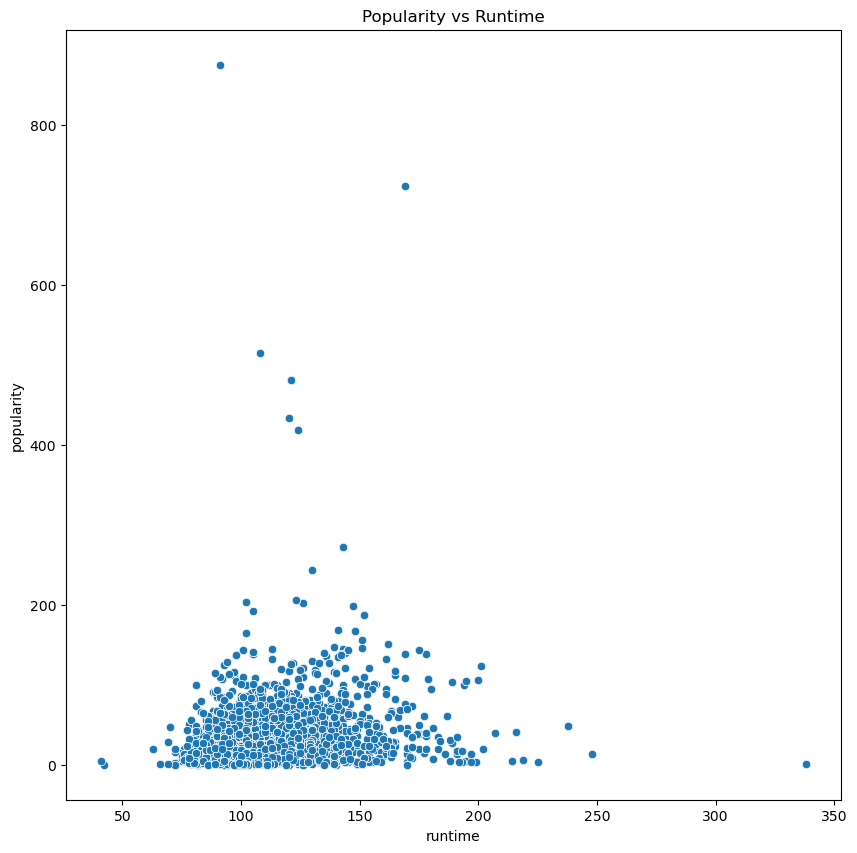

In [21]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=movies_df_new, x='runtime', y='popularity')
plt.title('Popularity vs Runtime')

Text(0.5, 1.0, 'Profit made based on movie genre')

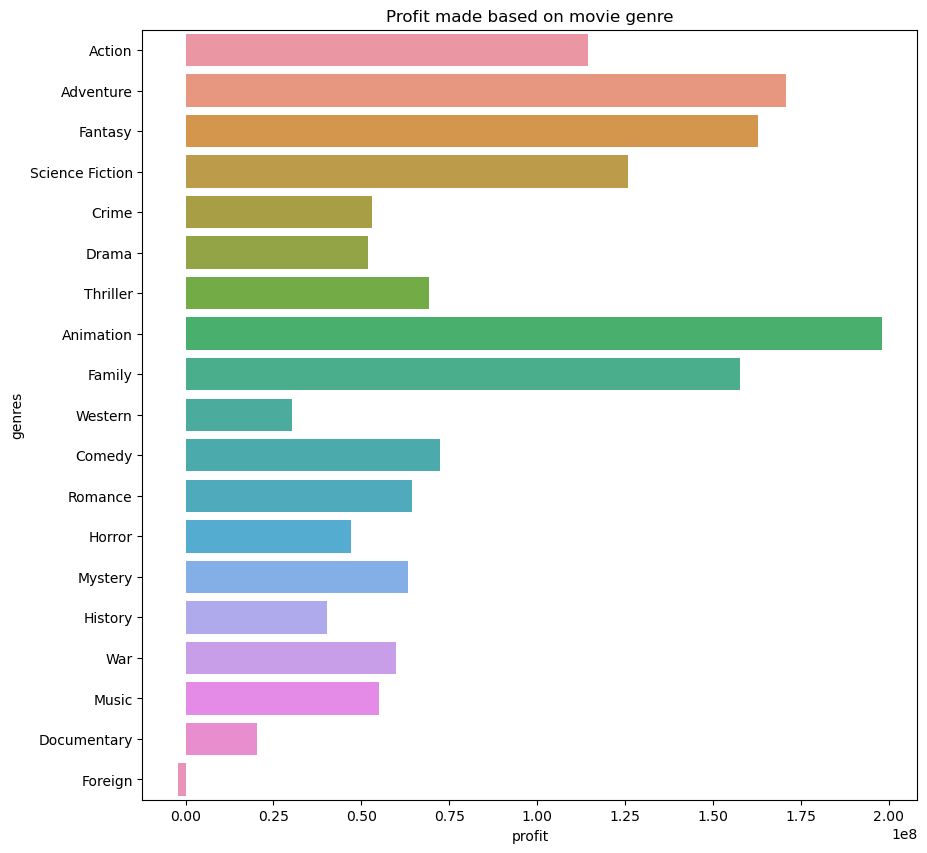

In [22]:
fig = plt.figure(figsize=(10,10))
sns.barplot(data=movies_df_new, y='genres', x='profit', ci=None)
plt.title('Profit made based on movie genre')

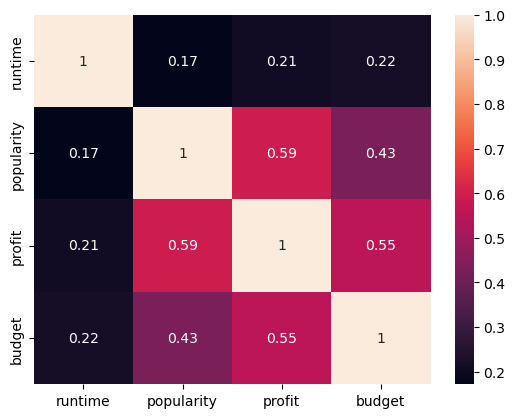

In [23]:
runtime_popularity_profit_budget = movies_df_new[['runtime','popularity','profit','budget']]
plt.figure()
corr_coeff_mat = runtime_popularity_profit_budget.corr()
sns.heatmap(corr_coeff_mat, annot=True)
plt.show()
plt.close()

From the 3 visualizations above, it can be determined that Animation movies are the most profitable. Followed by Adventure and Fantasy. Foreign movies run at a loss. A relationship between runtime and popularity cannot be determined from the scatter plot. 

However, the heatmap shows only 0.17 correlation for popularity and runtime, which is really weak. There is a moderate correlation between budget and profit, as well as profit and popularity. This tells us that popular movies have a good chance of being profitable. This could be in the form of marketing; through different platforms or just creating movies that have a larger target audience. Animated movies tend to have a wider audience, hence the larger profit margin.

Having a larger budget could also result in better quality movies that people could enjoy. Graphics, Audio, Acting, etc. all contribute to the movie quality.

# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)